## Problem 5 - Sampling and aliasing

()


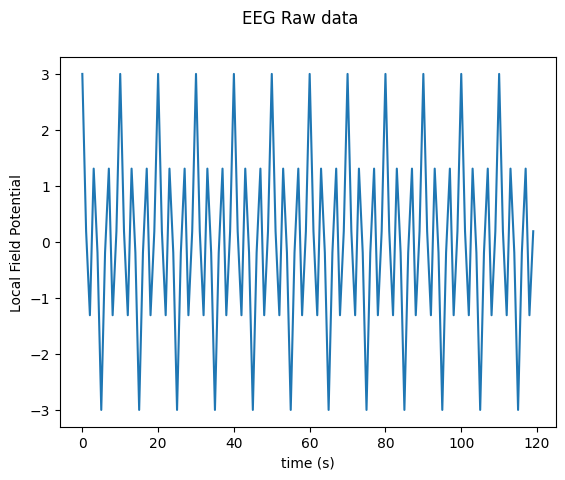

In [19]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fftpack import fft,fftfreq 
#Load and visualize given data 
load_data = loadmat('myMeasurements.mat')
eeg_data = load_data['sig'][0]
eeg_time = load_data['time'][0]
fig,axs = plt.subplots()
fig.suptitle('EEG Raw data')
axs.plot(eeg_time,eeg_data)
plt.xlabel("time (s)")
plt.ylabel("Local Field Potential")

print(np.shape(load_data))

(30,)


Text(0, 0.5, 'Local Field Potential')

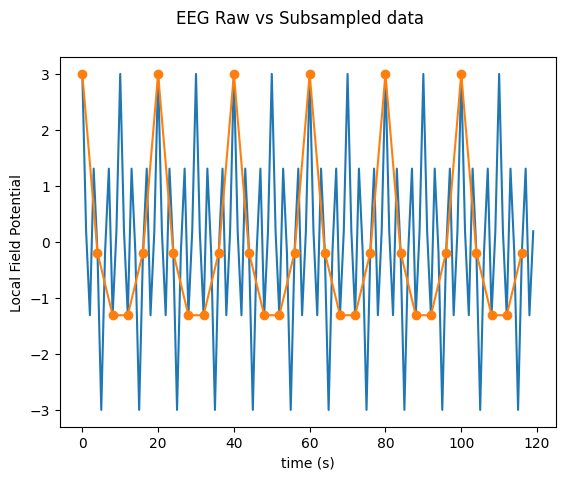

In [10]:
## a) Subsample the data every fourth sample
sub_eeg = eeg_data[0::4]
sub_time = eeg_time[0::4]
# Visualize downsampled data
fig,axs = plt.subplots()
fig.suptitle('EEG Raw vs Subsampled data')
axs.plot(eeg_time,eeg_data,label='Raw EEG')
axs.plot(sub_time,sub_eeg, '-o',label= 'Subsampled EEG')
plt.xlabel("time (ms)")
plt.ylabel("Local Field Potential")


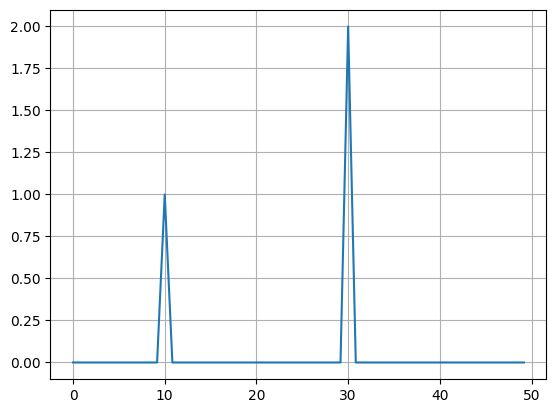

In [24]:
# b) Fourier abs
# Sample spacing
# Number of samplepoints
N = len(eeg_data)
T = 1.0 / 100.0 # Period = 1/freq
x = np.linspace(0.0, N*T, N, endpoint = False)
yf = fft(eeg_data)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

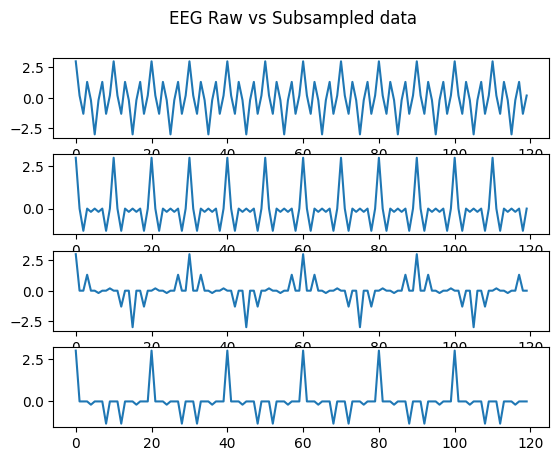

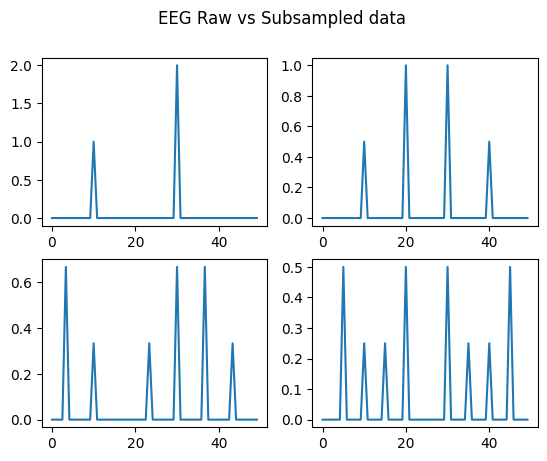

In [50]:
## c) 
sub2_eeg = np.zeros((1,120))[0]
sub2_eeg[::2] = eeg_data[::2]
sub3_eeg = np.zeros((1,120))[0]
sub3_eeg[::3] = eeg_data[::3]
sub4_eeg = np.zeros((1,120))[0]
sub4_eeg[::4] = eeg_data[::4]

# Calculate the Fourier transform of downsample data
sub2_fft = fft(sub2_eeg)
sub3_fft = fft(sub3_eeg)
sub4_fft = fft(sub4_eeg)

# Visualize downsample-upsample signals
fig,axs = plt.subplots(4,1)
fig.suptitle('EEG Raw vs Subsampled data')
axs[0].plot(eeg_time, eeg_data,label='100 Hz')
axs[1].plot(eeg_time, sub2_eeg,label='50 Hz')
axs[2].plot(eeg_time, sub3_eeg,label= '33 Hz')
axs[3].plot(eeg_time, sub4_eeg,label= '25 Hz')

# Visualize the downsampling effect
fig1,axs1 = plt.subplots(2,2)
fig1.suptitle('EEG Raw vs Subsampled data')
axs1[0,0].plot(xf, 2.0/N * np.abs(yf[0:N//2]),label='100 Hz')
axs1[0,1].plot(xf, 2.0/N * np.abs(sub2_fft[0:N//2]),label= '50 Hz')
axs1[1,0].plot(xf, 2.0/N * np.abs(sub3_fft[0:N//2]),label= '33 Hz')
axs1[1,1].plot(xf, 2.0/N * np.abs(sub4_fft[0:N//2]),label= '25 Hz')

